# Анализ данных на Python
## Практика. Новые признаки. Частотные таблицы. Базовая визуализация.
#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

Анализируем датасет с информацией об атлетах участвовавших в Олимпийских играх (`olymp.csv`). Скачайте его. Разделитель запятая.

Данные содержат следующие признаки:
- `ID` - уникальный номер спортсмена
- `Name` - имя атлета
- `Sex` - пол (мужской - M,  женский - F)
- `Age` - возраст атлета
- `Height` - рост (в см)
- `Weight` - вес (в кг)
- `Team` - cтрана
- `NOC` - код страны от Олимпийского комитета (3 буквы)
- `Games` - год и сезон Олимпийских игр
- `Year` - год Олимпийских игр
- `Season` - сезон (Зимние - Winter,  Лето - Summer)
- `City` - город проведения Олимпийских игр
- `Sport` - спортивная дисциплина
- `Event` - категория спортивной дисциплины
- `Medal` - достоинство медали (Золото - Gold, Серебро - Silver, Бронза - Bronze, Без медали - NaN)


In [3]:
import pandas as pd
olmp = pd.read_csv('../../data/olymp.csv')

# **Новые признаки**

## Задание 1
Создайте функцию `age_cat`, которая по столбцу с возрастом определяет атлета в одну из четырех групп:
- "меньше 18" (**0 - 17**)
- "от 18 до 30" (**18 - 29**)
- "30 и больше" (**от 30**)
- если информации о возрасте нет (**NaN**), то вернуть само значение из столбца c возрастом

In [2]:
def age_cat(x):
    if x < 18:
        return "меньше 18"
    elif 18 <= x < 30:
        return "от 18 до 30"
    elif x >= 30:
        return "30 и больше"
    else:
        return x

## Задание 2
Датафрейм лежит в переменной `olmp`. Примените функцию созданную в прошлом задании к столбцу `Age` и создайте новый признак `Age_category` в датафрейме `olmp`.

In [5]:
olmp['Age_category'] = olmp['Age'].apply(age_cat)

## Задание 3
Определите тип данных получившегося столбца `Age_category`

- числовой непрерывный
- числовой дискретный
- категориальный номинальный
- категориальный номинальный (бинарный)
- **категориальный порядковый**

## Задание 4
Определите процент атлетов в возрастной категории **30 и больше**, которые получили золотые медали (`Medal`: **Gold**). Ответ округлите до двух знаков после запятой. Целая от вещественной части отделена точкой.

**Алгоритм решения**:
1. Найдите, сколько уникальных атлетов входят в возрастную категорию **30 и больше**:
    - Сделайте фильтрацию и оставьте только возрастную категорию (`Age_category`) **30 и больше**
    - Примените метод `.unique('признак')`, который удалит всех повторяющихся атлетов в отфильтрованном датафрейме (по признаку `ID`)
    - Посчитайте количество уникальных атлетов с помощью свойства `.shape`
2. Найдите, сколько уникальных атлетов входят в возрастную категорию **30 и больше** и имеет **золотые** медали:
    - Сделайте фильтрацию и оставьте только возрастную категорию (`Age_category`) 30 и больше и атлетов, имеющих только золотые (**Gold**) медали (`Medal`)
    - Примените метод `.unique('признак')`, который удалит всех повторяющихся атлетов в отфильтрованном датафрейме (по признаку `ID`)
    - Посчитайте количество уникальных атлетов с помощью свойства `.shape`
3. Посчитайте процент атлетов из категории **30 и больше**, которые получили золотые (**Gold**) медали (`Medal`)

In [7]:
athletes_30 = olmp[olmp['Age_category'] == "30 и больше"]['ID'].nunique()
athletes_30_gold = olmp[(olmp['Age_category'] == "30 и больше") & (olmp['Medal'] == 'Gold')]['ID'].nunique()

round(athletes_30_gold / athletes_30 * 100, 2)

7.75

## Задание 5
Датафрейм лежит в переменной `olmp`. Cоздайте новый признак `BMI` в датафрейме `olmp`, который содержит информацию об индексе массы тела для каждого спортсмена на основе столбца с массой (`Weight`) и ростом (`Height`)
$$BMI=\frac{\text{Масса (кг)}}{\text{Рост (м)}^2}$$

HINT: Обратите внимание, что рост (`Height`) в таблице дан в сантиметрах, а по формуле рост нужен в метрах


In [9]:
olmp['BMI'] = olmp['Weight'] / (olmp['Height'] / 100)**2

## Задание 6
Определите тип данных получившегося столбца `BMI`
- **числовой непрерывный**
- числовой дискретный
- категориальный номинальный
- категориальный номинальный (бинарный)
- категориальный порядковый

## Задание 7
Найдите модуль разности между максимальным и минимальным значением индекса массы тела атлетов (`BMI`). Ответ округлите до двух знаков. Целая от вещественной части отделена точкой. 

**Алгоритм решения:**
1. Отсортируйте датафрейм по возрастанию по столбцу `BMI` и найдите минимальный индекс массы тела
2. Отсортируйте датафрейм по убыванию по столбцу `BMI` и найдите максимальный индекс массы тела
3. Найдите разницу между максимумом и минимумом  по модулю (функция `abs()`)

In [ ]:
# находим минимальный BMI
olmp.sort_values('BMI').head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_category,BMI
268586,134370,"Albert Ferdinand ""Al"" Zerhusen",M,24.0,183.0,28.0,United States,USA,1956 Summer,1956,Summer,Melbourne,Football,Football Men's Football,NaN,от 18 до 30,8.360954


In [ ]:
# находит максимальный BMI
olmp.sort_values('BMI', ascending=False).head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_category,BMI
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN,от 18 до 30,63.90158


In [22]:
63.90158 - 8.360954

55.540626

## Задание 8
Датафрейм лежит в переменной `olmp`. Вам дан список `NA_cities`, который содержит информацию о городах **Северной Америки**, в которых проводилась Олимпиада 

```python
NA_cities = ['St. Louis', 'Los Angeles', 'Lake Placid', 'Squaw Valley', 'Mexico City', 'Montreal', 'Calgary', 'Atlanta', 'Salt Lake City', 'Vancouver']
```

С помощью анонимной функции создайте новый признак `NA_olymp`, который бы возвращал **True**, если Олимпиада проводилась в **Северной Америке**, а иначе **False**. Определите это на основании признака `City`.

In [25]:
# in - позволяет проверить, есть ли подстрока в строке
print('abc' in '12abcccc92')
print('abc' in '12abd')

True
False


In [ ]:
# in - также позволяет проверить, есть ли значение в списке / множестве / словаре / кортеже
NA_cities = ['St. Louis', 'Los Angeles', 'Lake Placid', 'Squaw Valley', 'Mexico City', 'Montreal', 'Calgary', 'Atlanta', 'Salt Lake City', 'Vancouver']
print('Los Angeles' in NA_cities)

# чувствителей к регистру
print('los angeles' in NA_cities)

True
False


In [29]:
olmp['NA_olymp'] = olmp['City'].apply(lambda x: x in NA_cities)

olmp.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_category,BMI,NA_olymp
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,от 18 до 30,24.691358,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,от 18 до 30,20.761246,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,от 18 до 30,NaN,False


## Задание 9
Определите тип данных получившегося столбца `NA_olymp`
- числовой непрерывный
- числовой дискретный
- категориальный номинальный
- **категориальный номинальный (бинарный)**
- категориальный порядковый

## Задание 10
Определите в каком году (`Year`) были последние зимние (**Winter**) Олимпийские игры (по признаку `Season`) в **Северной Америке** (по признаку `NA_olymp`)

In [30]:
# Фильтрация - только зимние игры в Северной Америке
olmp_winter_NA = olmp[(olmp['Season'] == 'Winter') & (olmp['NA_olymp'] == True)]

# Сортировка по году - по убыванию (хотим первой строчкой видеть последние игры)
olmp_winter_NA.sort_values('Year', ascending=False).head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_category,BMI,NA_olymp
270965,135500,Kristaps Zvejnieks,M,17.0,185.0,87.0,Latvia,LAT,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Slalom,NaN,меньше 18,25.420015,True
270964,135500,Kristaps Zvejnieks,M,17.0,185.0,87.0,Latvia,LAT,2010 Winter,2010,Winter,Vancouver,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN,меньше 18,25.420015,True


# **Базовая визуализация**

## Задание 11
Соотнесите тип визуализации и признак:

![[image]](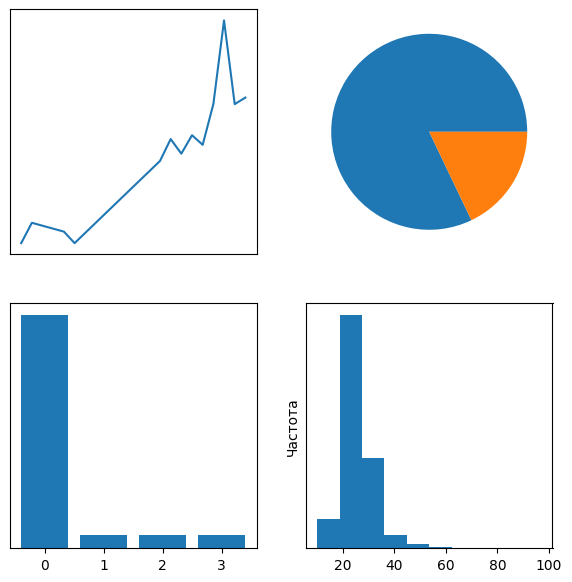)

Признак:

1. Распределение возраста атлетов - **Гистограмма**
2. Распределение игр по сезонам (Лето/Зима) - **Круговая диаграмма**
3. Динамика количества атлетов из Китая на летних Олимпийских играх - **Линейный график**
4. Распределение количества медалей (Золото/Серебро/Бронза/Без медали) - **Столбчатая диаграмма**

## Задание 12
Укажите, какой из графиков не визуализирует распределение количественных признаков для **Канады** (**Canada**; `Team`) на Олимпиаде **2014** года (`Year`)

![[image]](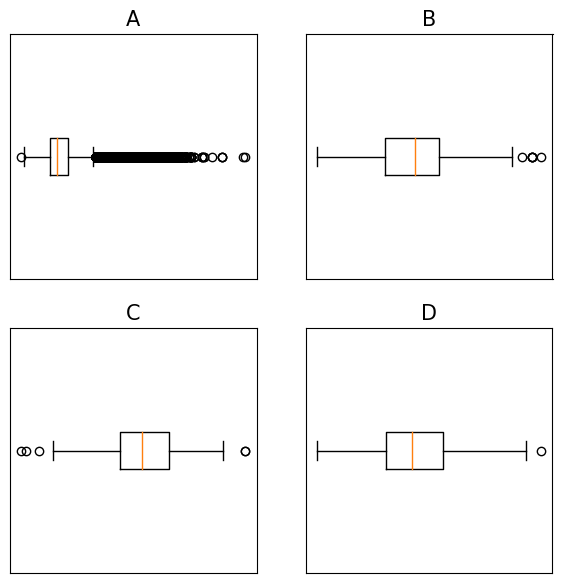)


In [31]:
# 1. Фильтрация
olmp_canada_2014 = olmp[(olmp['Team'] == 'Canada') & (olmp['Year'] == 2014)]

# 2. Смотрим на признаки
olmp_canada_2014.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_category,BMI,NA_olymp
2128,1181,Meghan Christina Agosta (-Marciano),F,26.0,168.0,67.0,Canada,CAN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Women's Ice Hockey,Gold,от 18 до 30,23.738662,False
6185,3473,Amanda Ammar,F,28.0,157.0,54.0,Canada,CAN,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,NaN,от 18 до 30,21.907582,False


<Axes: >

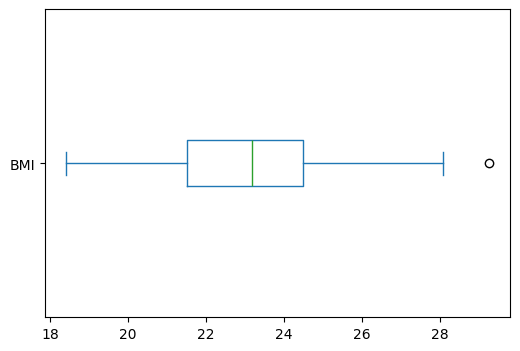

In [47]:
olmp_canada_2014[['BMI']].plot(kind='box', vert=False, figsize=(6, 4))

<Axes: >

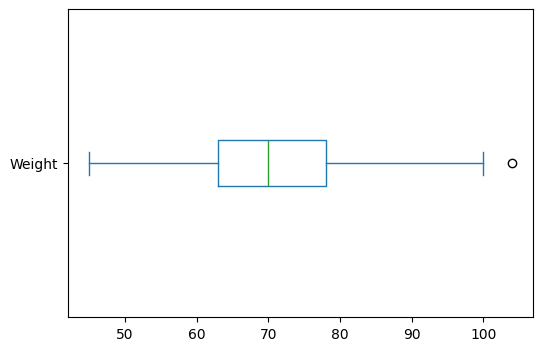

In [45]:
olmp_canada_2014[['Weight']].plot(kind='box', vert=False, figsize=(6, 4))

<Axes: >

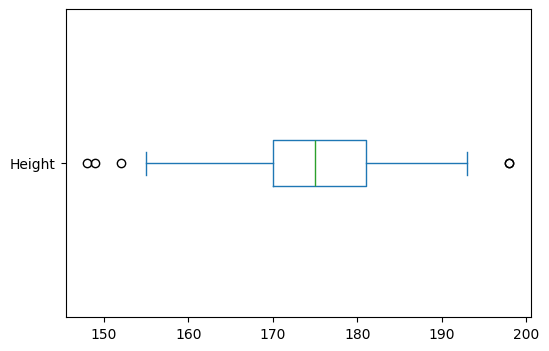

In [43]:
olmp_canada_2014[['Height']].plot(kind='box', vert=False, figsize=(6, 4))

<Axes: >

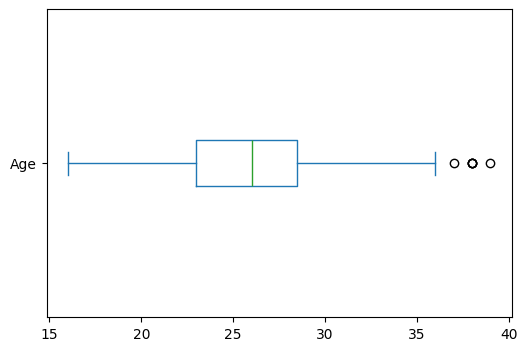

In [44]:
olmp_canada_2014[['Age']].plot(kind='box', vert=False, figsize=(6, 4))

## Задание 13
Соотнесите имена атлетов (`Name`) c диаграммами, показывающими сколько раз атлет бился за медали на каждой Олимпиаде в которой принимал участие (`Games`)

![[image]](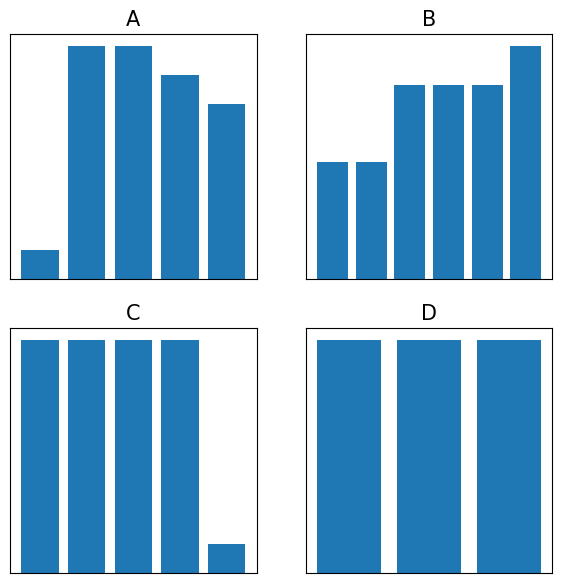)

**Алгоритм решения**:
1. Сделайте фильтрацию по имени атлета (`Name`)
2. По отфильтрованным данным постройте частотную таблицу (`.value_counts()`) по признаку `Games`
3. Отсортируйте частотную таблицу по столбцу индексов `.sort_index()`
4. Постройте графики с помощью метода `.plot()`

**Имена атлетов**:
1. Ole Einar Bjrndalen
2. Michael Fred Phelps, II
3. Takashi Ono
4. Borys Anfiyanovych Shakhlin

In [49]:
def athlete_hist(name):
    olmp_name = olmp[olmp['Name'] == name]
    olmp_name_games = olmp_name['Games'].value_counts()
    olmp_name_games = olmp_name_games.sort_index()
    olmp_name_games.plot(kind='bar', figsize=(6, 4))

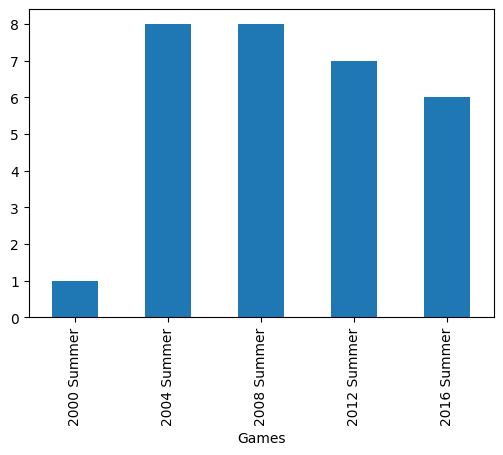

In [ ]:
athlete_hist('Ole Einar Bjrndalen')

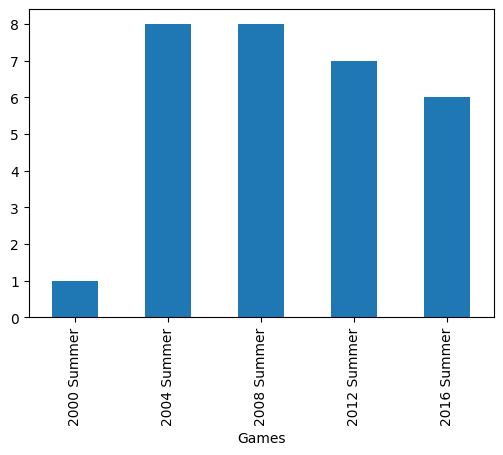

In [52]:
athlete_hist('Michael Fred Phelps, II')

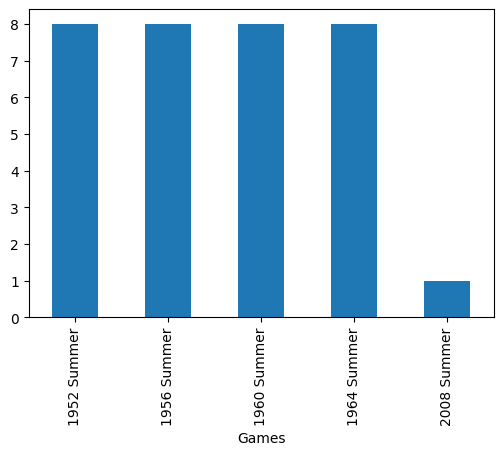

In [53]:
athlete_hist('Takashi Ono')

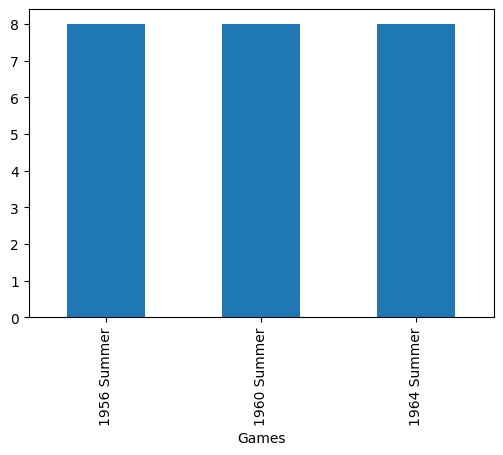

In [54]:
athlete_hist('Borys Anfiyanovych Shakhlin')

## Задание 14
Укажите, какой из графиков не визуализирует распределение бинарных признаков для Финляндии (**Finland**; `Team`)

![[image]](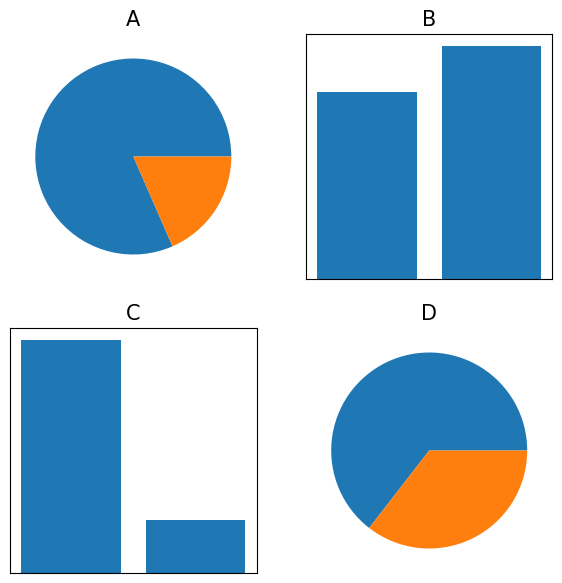)

In [58]:
olmp_fin = olmp[olmp['Team'] == 'Finland']
olmp_fin.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_category,BMI,NA_olymp
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,FIN,2002 Winter,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,от 18 до 30,27.748873,True
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,от 18 до 30,NaN,False


<Axes: xlabel='Sex'>

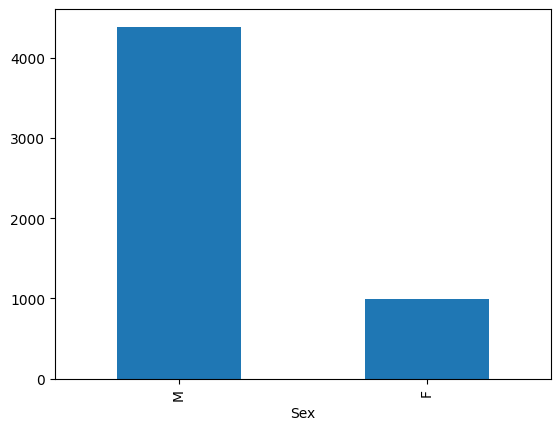

In [60]:
olmp_fin['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

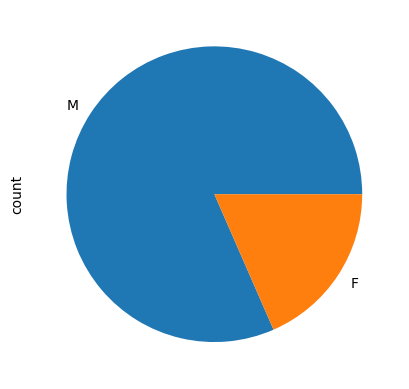

In [61]:
olmp_fin['Sex'].value_counts().plot(kind='pie')

<Axes: xlabel='NA_olymp'>

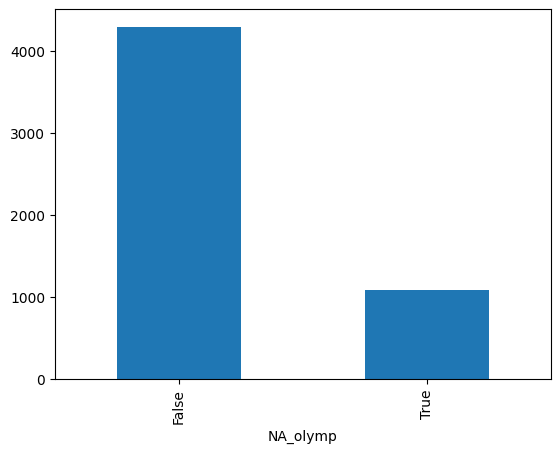

In [64]:
olmp_fin['NA_olymp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

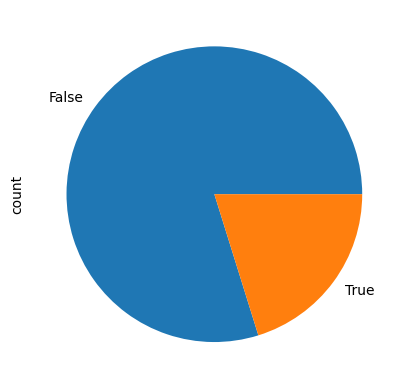

In [62]:
olmp_fin['NA_olymp'].value_counts().plot(kind='pie')

## Задание 15
Укажите, какой из графиков визуализирует распределение признака `Weight` для США (**United States**; `Team`)

![[image]](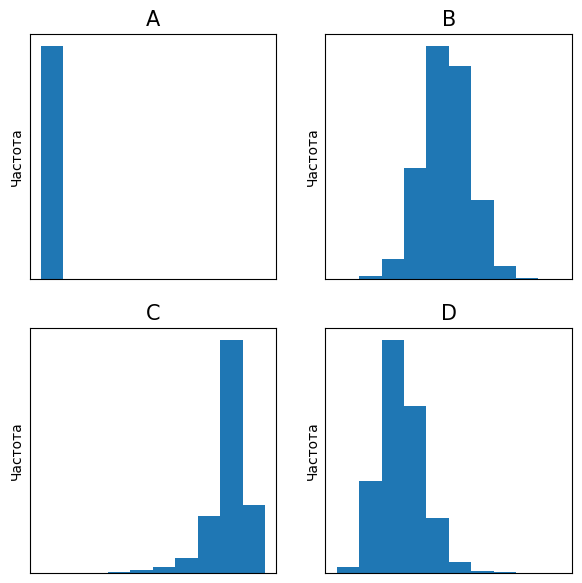)

<Axes: ylabel='Frequency'>

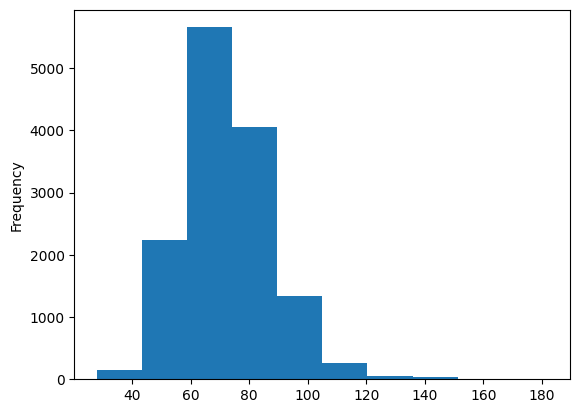

In [65]:
olmp_usa = olmp[olmp['Team'] == 'United States']
olmp_usa['Weight'].plot(kind='hist')

## Задание 16
Постройте график, показывающий зависимость веса атлета (`Weight`) от их роста (`Height`). Укажите все верные утверждения. 

- Признаки лежат в одном диапазоне
- **В данных нет атлетов чей рост меньше 140 см с весом более 100 кг**
- **Вес большинства атлетов не превышает 125 кг**
- **Рост большинства атлетов более 160 см**

<Axes: xlabel='Weight', ylabel='Height'>

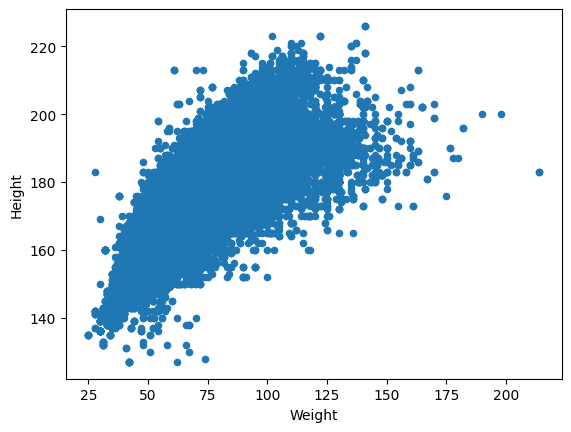

In [66]:
olmp.plot('Weight', 'Height', kind='scatter')